# Lecture & Preprocessing Data Corona-Work

In [1]:
import json 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture des Données

In [2]:
with open("data_CoronaWork_dict.json") as json_file:
    data = json.load(json_file)

In [3]:
#noms des colonnes
list(data.keys())

['nhits', 'parameters', 'records', 'facet_groups']

In [4]:
# Récupérer les données 
records=data['records']
#type(records[1])dict
#len(records)


In [5]:
#data['records'][1]

# Nettoyage 1 data : transformation du dict en liste de dict lisible 
data est un dictionnaire dont les valeurs dont des dictionnaires, et chaque dictionnaire et formés de plusieurs dictionnaires 

In [6]:
# Répéter ces étapes sur tous les éléments de records 
data_org=[]
i=0
for elt in records:
    # elt1 est un dictionnaire contennant 4 keys datasetid, recorded, fields, record_timestamp, geometry
    # de toutes ces valeurs ils nous intéressent uniquement : fields (à nettoyer) et geometry à réorganiser
    elt1=elt
    
    # supprimer les colonnes qui ne sert à rien dans mon cas  
    del elt1['datasetid'], elt1['recordid'], elt1['record_timestamp']
        
    # récupérer le champs fields qui contient tout les réponses et geom (qui est à supprimer du dict)
    elt1_response=elt1.get('fields')
    
    
    try :
        # à sauvegarder c'est une map et après soit on la laisse soit on supprime
        geom_tot=elt1_response['geom']
        Coordinates_tot=geom_tot['coordinates']
        # supprimer la geom qui contient les données de la carte de la france du dictionnaire réponse 
        x=elt1_response.pop('geom')
 
    
        # Récupération des données géographiques (elt1['geometry'] est une liste [longitude, latitude])
        elt1_geometry=elt1.get('geometry')
        long=elt1_geometry['coordinates'][0]
        lat=elt1_geometry['coordinates'][1]
    
        #inclure deux variables longitudes et latitudes dans le dictionnaire  
        elt1_response['longitude']=long
        elt1_response['latitude']=lat
    except KeyError:
        z=4
        #print("i = = ",i)
    
    
    
    #les déposer dans data org
    data_org.append(elt1_response)
    
    #print (i)
    #i+=1   
        

In [7]:
#data_org
#len(data_org)
#data_org[1488]

# Mettre les données dans data Frame

In [8]:
# récupérer les noms de colonnes 
columns_name=list(data_org[1].keys())

# créer un dataframe avec des colonnes ayant pour nom les questions posées
data_news = pd.DataFrame(columns=columns_name)

In [9]:
# remplir les données dans le data Frame
for elt in data_org:
    data_news=data_news.append(elt, ignore_index=True)

In [10]:
data_news

,pensez_vous_que_le_teletravail_confine_ait_un_impact_sur_l_efficacite_du_travail_de_votre_equipe_pro,ou_etes_vous_confine_e,depuis_le_confinement_votre_temps_de_travail_effectif_a_t_il_change,combien_de_personnes_au_total_vivent_actuellement_dans_votre_lieu_de_confinement,les_consignes_de_teletravail_communiquees_par_votre_employeur_vous_paraissent_elles_efficaces,avez_vous_progresse_sur_l_utilisation_des_outils_collaboratifs_visioconference_messagerie_documents_,quel_age_avez_vous,depuis_le_confinement_vous_suivez_l_actualite,combien_de_fois_etes_vous_sorti_e_au_cours_de_la_derniere_semaine,depuis_le_confinement_la_frequence_des_interactions_avec_vos_collegues_a_t_elle_changee,...,region,quelles_sont_les_causes_importantes_de_distraction,longitude,latitude,combien_de_personnes_proches_avec_des_symptomes_du_covid_19_connaissez_vous,qu_est_ce_que_cette_experience_de_confinement_vous_apprend_selon_vous,comment_evaluez_vous_votre_bien_etre_apres_le_debut_du_confinement,comment_evaluez_vous_votre_bien_etre_avant_le_debut_du_confinement,vous_etes0,quelles_sont_vos_nouvelles_priorites
0,2,Dans votre résidence secondaire,3,2,3,Un peu,71,3,Une fois par jour,3,...,32,"Vous regardez très régulièrement l'actualité,V...",2.771384,49.969511,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Dans votre domicile,1,2,4,"Non, je les utilisais déjà beaucoup",26,3,Une fois dans la semaine ou moins,4,...,11,"La présence d'autres personnes,Les interaction...",2.503397,48.709313,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Dans votre domicile,4,4,5,Beaucoup,47,5,Un jour sur deux,3,...,11,Vous n'êtes pas particulièrement distrait.e,2.503397,48.709313,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Dans votre domicile,2,1,4,"Non, je les utilisais déjà beaucoup",33,5,Une fois dans la semaine ou moins,3,...,11,"La situation liée au Covid 19,Les interactions...",2.503397,48.709313,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Dans votre domicile,4,2,3,Un peu,31,4,Une fois par jour,4,...,84,Vous regardez très régulièrement l'actualité,4.536129,45.514647,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,3,Dans votre domicile,1,2,4,"Non, je les utilisais déjà beaucoup",32,4,Deux fois ou plus par jour,4,...,NaN,Les tâches ménagères,NaN,NaN,1-3 personnes,A faire plus attention à mes proches,3.0,4.0,En couple et nous sommes confinés ensemble,NaN
1485,3,Dans votre domicile,5,4,3,"Non, je les utilisais déjà beaucoup",48,4,Deux fois ou plus par jour,2,...,NaN,Vous n'êtes pas particulièrement distrait.e,NaN,NaN,1-3 personnes,A télétravailler,4.0,4.0,En couple mais nous ne sommes pas confinés ens...,NaN
1486,1,Dans votre domicile,1,8,5,"Non, je ne les utilise pas",20,1,Une fois par jour,1,...,NaN,"La situation liée au Covid 19,Vous n'êtes pas ...",NaN,NaN,Aucune,A changer mes priorités,2.0,5.0,Célibataire,working and money
1487,3,Dans votre domicile,5,5,5,Un peu,26,4,Une fois dans la semaine ou moins,4,...,NaN,Vous faites régulièrement des tâches personnel...,NaN,NaN,1-3 personnes,"A télétravailler, A changer mes priorités",3.0,3.0,Célibataire,Aucune


In [11]:
#len(list(data_news.columns))
#list(data_news.columns)

# Compréhension et Nettoyage 2 data : 
### Changements des nomns de colonnes 
### Supprimer les données colonnes inutiles 
#### Sibstitution des NaN et des valeurs abérentes

In [12]:
# Rennommer les colonnes :
data_news.rename(columns={'pensez_vous_que_le_teletravail_confine_ait_un_impact_sur_l_efficacite_du_travail_de_votre_equipe_pro': 'Avis_efficacite_travail_confine',
                   'ou_etes_vous_confine_e': 'lieu_confinement',
                   'depuis_le_confinement_votre_temps_de_travail_effectif_a_t_il_change': 'variation_temps_travail_conf',
                   'combien_de_personnes_au_total_vivent_actuellement_dans_votre_lieu_de_confinement': 'nbre_personne_dans_lieu_conf',
                   'les_consignes_de_teletravail_communiquees_par_votre_employeur_vous_paraissent_elles_efficaces': 'efficacite_consignes_teletravaildonne_par_employeur',
                   'avez_vous_progresse_sur_l_utilisation_des_outils_collaboratifs_visioconference_messagerie_documents_': 'progression_sur_outils_collaboratifs',
                   'quel_age_avez_vous': 'age',
                   'depuis_le_confinement_vous_suivez_l_actualite': 'eval_suivi_actualite',
                   'combien_de_fois_etes_vous_sorti_e_au_cours_de_la_derniere_semaine': 'frequence_sortir_en_semaine',
                   'depuis_le_confinement_la_frequence_des_interactions_avec_vos_collegues_a_t_elle_changee': 'eval_frequence_interaction_avec_collegues_enconf',
                   'comment_evaluez_vous_vos_conditions_de_travail_avant_le_confinement': 'evaluation_condition_travail_avant_conf',
                   'selon_vous_quels_sont_les_consequences_negatives_du_teletravail_en_mode_confine': "Consequence_negatives_teletravailconfines",
                   'est_ce_que_vous_diriez_que_le_confinement_ameliore_vos_relations_avec_vos_co_confines': "impact_confinnement_relations_avec_confines",
                   'dans_votre_metier_vous_etes_amene_e_a': 'nature_travail',
                   'parmi_ces_personnes_combien_sont_des_enfants_de_moins_de_12_ans': 'nbre_enfants_moins_12',
                   'depuis_le_confinement_vous_etes_en_contact_avec_votre_famille_et_vos_amis': 'eval_contact_avec_famille',
                   'pouvez_vous_vous_isoler_dans_une_piece_du_logement_pour_travailler_sans_etre_derange_e_en_cas_de_bes': 'isolation_pour travailler',
                   'depuis_le_confinement_comment_jugeriez_vous_votre_concentration_dans_le_travail': 'evaluation_concentration_enconf',
                   'selon_vous_quels_sont_les_consequences_positives_du_teletravail_en_mode_confine': "avantage_teletravail_confin",
                   'avant_le_confinement_a_quelle_frequence_aviez_vous_recours_au_teletravail': 'fréquence_téletravail_avant_conf',
                   'avez_vous_reamenage_vos_horaires_de_travail_habituels': 'reamenagement_heures_travails_habituels',
                   'depuis_le_confinement_vous_mangez': 'evaluation_manger',
                   'depuis_le_confinement_vous_buvez_de_l_alcool': 'evaluatuin_boire_alcool',
                   'comment_evaluez_vous_vos_conditions_de_travail_apres_le_debut_du_confinement': 'evaluation_condition_travail_apres_debut_conf',
                   'diriez_vous_que_vous_avez_des_inquietudes_sur_la_perennite_de_votre_emploi_a_cause_du_covid_19': 'inquiet_sur_perennite_acauseCovid',
                   'votre_employeur_est_une': 'taille_entreprise',
                   'parmi_vous_combien_sont_dans_leur_residence_principale': 'nbre_resident_enresidence_principal',
                   'lorsque_la_situation_sera_revenue_a_la_normale_aimeriez_vous_continuer_a_teletravailler': 'aimer_continuer_teltravail_enfutur',
                   'combien_de_temps_mettiez_vous_a_vous_rendre_sur_votre_lieu_de_travail': 'tempstransport_maison_entreprise',
                   'depuis_le_confinement_vous_faites_de_l_activite_physique': 'activite_sportif',
                   'actuellement_vous_etes': 'statut_professionnel',
                   'depuis_le_confinement_vous_prenez_soin_de_votre_apparence': 'soin_apparence_en_conf',
                   'est_ce_que_vous_avez_des_contrarietes_particulieres_liees_a_la_propagation_du_covid_19_et_ses_conseq': "contraries_lies_covid19",
                   'vous_etes': 'genre',
                   'avez_vous_acces_a_un_espace_exterieur': 'acces_surface_exterieur',
                   'quelle_est_la_surface_de_votre_lieu_de_confinement_en_m2': 'surface_lieu_confinement',
                   'votre_equipement_en_bureautique_est_il_satisfaisant': 'satisfaction_equipement_bureautique',
                   'quelles_sont_les_causes_importantes_de_distraction': 'cause_distraction',
                          'combien_de_personnes_proches_avec_des_symptomes_du_covid_19_connaissez_vous':'nbre_personne_symptem_covid',
                     'qu_est_ce_que_cette_experience_de_confinement_vous_apprend_selon_vous':'apprend_de_cette_experience',
                          'comment_evaluez_vous_votre_bien_etre_apres_le_debut_du_confinement': 'eval_bien_etre_apres_conf',
                          'comment_evaluez_vous_votre_bien_etre_avant_le_debut_du_confinement':'eval_bien_etre_avant_conf',
                          'vous_etes0':'statut_familial',
                          'quelles_sont_vos_nouvelles_priorites':'nouvelles_priorites'}, inplace=True)

In [13]:
#supprimer les colonnes inutiles et doublez ou contenant des données insuffisantes
#data_news.pop('en_soumettant_ce_formulaire_acceptez_vous_que_les_informations_saisies_soient_exploitees_dans_le_cad')
#data_news.pop('geo_point_2d')
#data_news.pop( 'est_ce_que_vous_etes_actuellement_a_la_fois_confine_e_et_en_teletravail_en_france')
data_news.drop(columns=['en_soumettant_ce_formulaire_acceptez_vous_que_les_informations_saisies_soient_exploitees_dans_le_cad',
                 'est_ce_que_vous_etes_actuellement_a_la_fois_confine_e_et_en_teletravail_en_france',
                'geo_point_2d','nouvelles_priorites'],inplace=True)

In [14]:
data_news.columns

Index(['Avis_efficacite_travail_confine', 'lieu_confinement',
       'variation_temps_travail_conf', 'nbre_personne_dans_lieu_conf',
       'efficacite_consignes_teletravaildonne_par_employeur',
       'progression_sur_outils_collaboratifs', 'age', 'eval_suivi_actualite',
       'frequence_sortir_en_semaine',
       'eval_frequence_interaction_avec_collegues_enconf',
       'evaluation_condition_travail_avant_conf',
       'Consequence_negatives_teletravailconfines',
       'impact_confinnement_relations_avec_confines', 'nature_travail',
       'nbre_enfants_moins_12', 'eval_contact_avec_famille',
       'isolation_pour travailler', 'evaluation_concentration_enconf',
       'avantage_teletravail_confin', 'fréquence_téletravail_avant_conf',
       'reamenagement_heures_travails_habituels', 'evaluation_manger',
       'evaluatuin_boire_alcool',
       'evaluation_condition_travail_apres_debut_conf',
       'inquiet_sur_perennite_acauseCovid', 'taille_entreprise',
       'nbre_resident_en

In [15]:
data_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 46 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Avis_efficacite_travail_confine                      1483 non-null   object 
 1   lieu_confinement                                     1485 non-null   object 
 2   variation_temps_travail_conf                         1484 non-null   object 
 3   nbre_personne_dans_lieu_conf                         1480 non-null   object 
 4   efficacite_consignes_teletravaildonne_par_employeur  1410 non-null   object 
 5   progression_sur_outils_collaboratifs                 1482 non-null   object 
 6   age                                                  1486 non-null   object 
 7   eval_suivi_actualite                                 1484 non-null   object 
 8   frequence_sortir_en_semaine                          1482 non-null  

In [16]:
data_news.head()

,Avis_efficacite_travail_confine,lieu_confinement,variation_temps_travail_conf,nbre_personne_dans_lieu_conf,efficacite_consignes_teletravaildonne_par_employeur,progression_sur_outils_collaboratifs,age,eval_suivi_actualite,frequence_sortir_en_semaine,eval_frequence_interaction_avec_collegues_enconf,...,satisfaction_equipement_bureautique,region,cause_distraction,longitude,latitude,nbre_personne_symptem_covid,apprend_de_cette_experience,eval_bien_etre_apres_conf,eval_bien_etre_avant_conf,statut_familial
0,2,Dans votre résidence secondaire,3,2,3,Un peu,71,3,Une fois par jour,3,...,5,32,"Vous regardez très régulièrement l'actualité,V...",2.771384,49.969511,NaN,NaN,NaN,NaN,NaN
1,2,Dans votre domicile,1,2,4,"Non, je les utilisais déjà beaucoup",26,3,Une fois dans la semaine ou moins,4,...,3,11,"La présence d'autres personnes,Les interaction...",2.503397,48.709313,NaN,NaN,NaN,NaN,NaN
2,2,Dans votre domicile,4,4,5,Beaucoup,47,5,Un jour sur deux,3,...,5,11,Vous n'êtes pas particulièrement distrait.e,2.503397,48.709313,NaN,NaN,NaN,NaN,NaN
3,3,Dans votre domicile,2,1,4,"Non, je les utilisais déjà beaucoup",33,5,Une fois dans la semaine ou moins,3,...,4,11,"La situation liée au Covid 19,Les interactions...",2.503397,48.709313,NaN,NaN,NaN,NaN,NaN
4,2,Dans votre domicile,4,2,3,Un peu,31,4,Une fois par jour,4,...,2,84,Vous regardez très régulièrement l'actualité,4.536129,45.514647,NaN,NaN,NaN,NaN,NaN


### Compréhension des données

In [17]:
liste=list(data_news.columns)

In [18]:
Remarque={} 
nb_isnan={}
for elt in liste :
    
    Remarque[elt] = list(set(data_news[elt]))
    nb_isnan[elt]=data_news[elt].isna().sum()

In [19]:
Remarque

{'Avis_efficacite_travail_confine': [nan, 1, 2, 3, 4, 5, nan],
 'lieu_confinement': [nan,
  'Chez un membre de votre famille',
  'Chez mon copain',
  'Dans votre domicile',
  'Chez ma copine',
  'Appartement de ma conjointe',
  'chez ma conjointe',
  'Chez mes beaux-parents',
  'Chez mon compagnon',
  'Chez des amis',
  "A l'étranger",
  'Dans une maison de famille',
  'Chez des amis / Chez la famille',
  'Dans votre résidence secondaire',
  'Domicile compagnon',
  'dans la famille de mon conjoint'],
 'variation_temps_travail_conf': [nan, 1, 2, 3, 4, 5, nan],
 'nbre_personne_dans_lieu_conf': [nan, 1, 2, 3, 4, 5, 6, 7, nan, 9, 10, 8],
 'efficacite_consignes_teletravaildonne_par_employeur': [nan,
  nan,
  1,
  3,
  4,
  5,
  nan,
  2,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

In [20]:
nb_isnan

{'Avis_efficacite_travail_confine': 6,
 'lieu_confinement': 4,
 'variation_temps_travail_conf': 5,
 'nbre_personne_dans_lieu_conf': 9,
 'efficacite_consignes_teletravaildonne_par_employeur': 79,
 'progression_sur_outils_collaboratifs': 7,
 'age': 3,
 'eval_suivi_actualite': 5,
 'frequence_sortir_en_semaine': 7,
 'eval_frequence_interaction_avec_collegues_enconf': 7,
 'evaluation_condition_travail_avant_conf': 4,
 'Consequence_negatives_teletravailconfines': 53,
 'impact_confinnement_relations_avec_confines': 219,
 'nature_travail': 5,
 'nbre_enfants_moins_12': 217,
 'eval_contact_avec_famille': 6,
 'isolation_pour travailler': 219,
 'evaluation_concentration_enconf': 8,
 'avantage_teletravail_confin': 44,
 'fréquence_téletravail_avant_conf': 6,
 'reamenagement_heures_travails_habituels': 4,
 'evaluation_manger': 5,
 'evaluatuin_boire_alcool': 11,
 'evaluation_condition_travail_apres_debut_conf': 8,
 'inquiet_sur_perennite_acauseCovid': 13,
 'taille_entreprise': 5,
 'nbre_resident_enres

In [21]:
keys=list(Remarque.keys())

In [22]:
Values=list(Remarque.values())

In [23]:
Remarque_invers=pd.DataFrame()
Remarque_invers['Keys'] = keys
Remarque_invers['values']=Values
#Remarque_invers=pd.DataFrame()
Remarque_invers

,Keys,values
0,Avis_efficacite_travail_confine,"[nan, 1, 2, 3, 4, 5, nan]"
1,lieu_confinement,"[nan, Chez un membre de votre famille, Chez mo..."
2,variation_temps_travail_conf,"[nan, 1, 2, 3, 4, 5, nan]"
3,nbre_personne_dans_lieu_conf,"[nan, 1, 2, 3, 4, 5, 6, 7, nan, 9, 10, 8]"
4,efficacite_consignes_teletravaildonne_par_empl...,"[nan, nan, 1, 3, 4, 5, nan, 2, nan, nan, nan, ..."
5,progression_sur_outils_collaboratifs,"[nan, Beaucoup, Non, je ne les utilise pas, na..."
6,age,"[nan, nan, 14, 17, 18, 19, 20, 21, 22, 23, 24,..."
7,eval_suivi_actualite,"[nan, 1, 2, 3, 4, 5, nan]"
8,frequence_sortir_en_semaine,"[nan, nan, Une fois par jour, Une fois dans la..."
9,eval_frequence_interaction_avec_collegues_enconf,"[nan, 1, 2, 3, 4, 5, nan]"


In [24]:
data_news.isna().sum()

Avis_efficacite_travail_confine                          6
lieu_confinement                                         4
variation_temps_travail_conf                             5
nbre_personne_dans_lieu_conf                             9
efficacite_consignes_teletravaildonne_par_employeur     79
progression_sur_outils_collaboratifs                     7
age                                                      3
eval_suivi_actualite                                     5
frequence_sortir_en_semaine                              7
eval_frequence_interaction_avec_collegues_enconf         7
evaluation_condition_travail_avant_conf                  4
Consequence_negatives_teletravailconfines               53
impact_confinnement_relations_avec_confines            219
nature_travail                                           5
nbre_enfants_moins_12                                  217
eval_contact_avec_famille                                6
isolation_pour travailler                              2

In [25]:
Remarque_invers.to_csv('Remarque_data_Corona.csv',index=False)

### Remplacement des Nan par les modes si c'est une évaluation ou catégories et par médiane ou moyenne si c'est des integer 
Dans notre cas nous avons rempli par les integers par les médianes car la distribution est asymétrique 
les données catégoriques (non numériques) mode integer par 

In [26]:
H=list(data_news.head())

In [27]:
# répartition par nature de donnée, si c'est du évalution (1,2,5, etc.. Homme, Femme)
# ou si c'est des entiers et on calcul la moyenne 
#H_median=['nbre_personne_dans_lieu_conf','age',
 #       'nbre_enfants_moins_12','nbre_resident_enresidence_principal',
  #      'surface_lieu_confinement']

H_median=['nbre_personne_dans_lieu_conf','age',
          'nbre_enfants_moins_12','nbre_resident_enresidence_principal',
          'surface_lieu_confinement','longitude','latitude']



# par meadian 
H_eval= [x for x in H if x not in H_median]



In [28]:
data_news['avantage_teletravail_confin'].isna().sum()

44

In [29]:
# juste pour les évaluations 

## test unitaire

#data_news['Avis_efficacite_travail_confine'].isna().sum()
#data_news['genre'].value_counts(normalize=False)
#data_news['genre'].mode()[0]
#data_news['genre'].fillna(data_news['genre'].mode()[0],inplace=True)
# data_news['genre'].value_counts(normalize=False)
#data_news.isna().sum()

for elt in H_eval:
    data_news[elt].fillna(data_news[elt].mode()[0],inplace=True)
    
        
#uniquement pour les moyennes



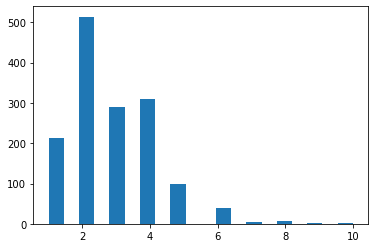

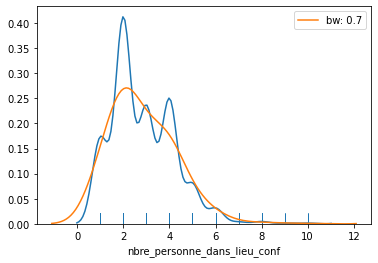

In [30]:
#uniquement pour les moyennes
#en premier temps vérifie une distribution gaussienne (sous forme de cloche),
# si distribution gaussienne on remplace par moyenne 
# si distribution assymétrique on remplace par médiane 
plt.hist(data_news['nbre_personne_dans_lieu_conf'], bins=20)
plt.show()

sns.distplot(data_news['nbre_personne_dans_lieu_conf'],hist=False, rug=True);
sns.kdeplot(data_news['nbre_personne_dans_lieu_conf'], bw=0.7, label="bw: 0.7");
#sns.kdeplot(data_news['nbre_personne_dans_lieu_conf'],shade=True)
# Le paramètre de bande passante (pb) du KDE contrôle la précision de l'ajustement de l'estimation aux données,
#un peu comme la taille du bac dans un histogramme. 
#Cela correspond à la largeur des grains que nous avons tracés ci-dessus. 
#Le comportement par défaut essaie de deviner une bonne valeur à l'aide d'une règle de référence commune, 
#mais il peut être utile d'essayer des valeurs plus grandes ou plus petites:

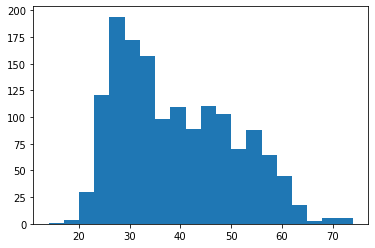

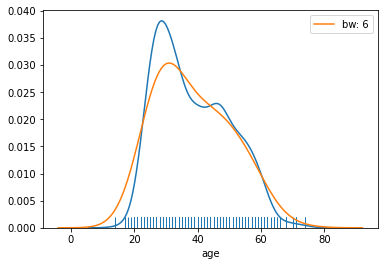

In [31]:
plt.hist(data_news['age'], bins=20)
plt.show()

sns.distplot(data_news['age'],hist=False, rug=True);
sns.kdeplot(data_news['age'], bw=6, label="bw: 6");

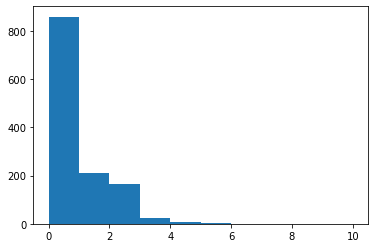

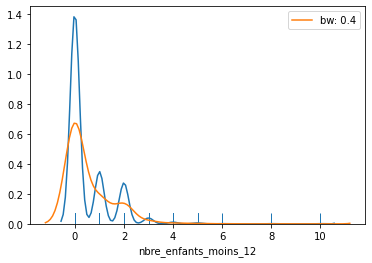

In [32]:
plt.hist(data_news['nbre_enfants_moins_12'], bins=10)
plt.show()

sns.distplot(data_news['nbre_enfants_moins_12'],hist=False, rug=True);
sns.kdeplot(data_news['nbre_enfants_moins_12'], bw=0.4, label="bw: 0.4");

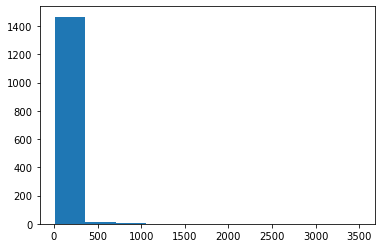

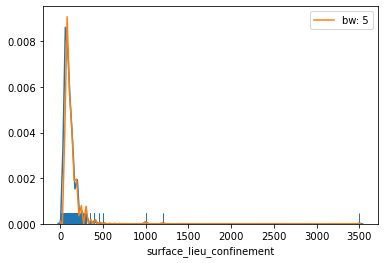

In [33]:
plt.hist(data_news['surface_lieu_confinement'], bins=10)
plt.show()

sns.distplot(data_news['surface_lieu_confinement'],hist=False, rug=True);
sns.kdeplot(data_news['surface_lieu_confinement'], bw=5, label="bw: 5");


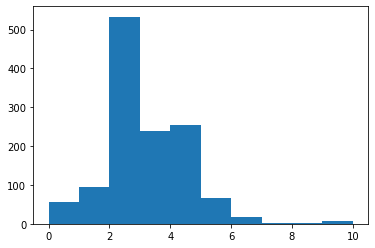

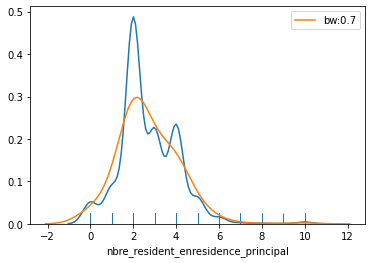

In [34]:
plt.hist(data_news['nbre_resident_enresidence_principal'], bins=10)
plt.show()

sns.distplot(data_news['nbre_resident_enresidence_principal'],hist=False, rug=True);
sns.kdeplot(data_news['nbre_resident_enresidence_principal'], bw=0.7, label="bw:0.7");


/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


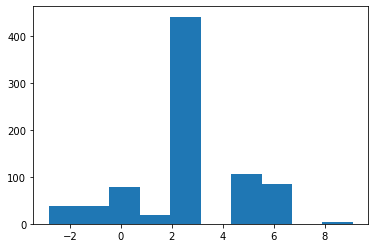

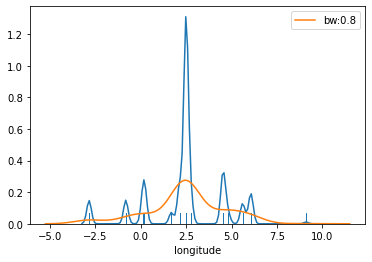

In [35]:
plt.hist(data_news['longitude'], bins=10)
plt.show()

sns.distplot(data_news['longitude'],hist=False, rug=True);
sns.kdeplot(data_news['longitude'], bw=0.8, label="bw:0.8");

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


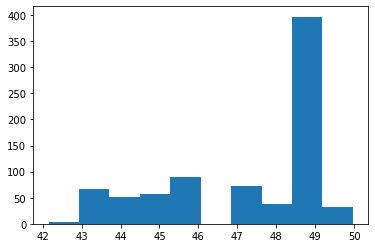

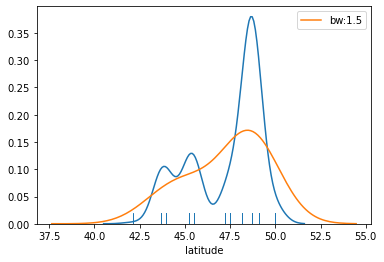

In [36]:
plt.hist(data_news['latitude'], bins=10)
plt.show()

sns.distplot(data_news['latitude'],hist=False, rug=True);
sns.kdeplot(data_news['latitude'], bw=1.5, label="bw:1.5");

In [37]:
#on remarque la distribution des donnée n'est pas centrée, donc il faut remplacée par la médiane

for elt in H_median:
    data_news[elt].fillna(data_news[elt].median(),inplace=True)

In [38]:
data_news.isna().sum()

Avis_efficacite_travail_confine                        0
lieu_confinement                                       0
variation_temps_travail_conf                           0
nbre_personne_dans_lieu_conf                           0
efficacite_consignes_teletravaildonne_par_employeur    0
progression_sur_outils_collaboratifs                   0
age                                                    0
eval_suivi_actualite                                   0
frequence_sortir_en_semaine                            0
eval_frequence_interaction_avec_collegues_enconf       0
evaluation_condition_travail_avant_conf                0
Consequence_negatives_teletravailconfines              0
impact_confinnement_relations_avec_confines            0
nature_travail                                         0
nbre_enfants_moins_12                                  0
eval_contact_avec_famille                              0
isolation_pour travailler                              0
evaluation_concentration_enconf

# Mettre les données DataFrame dans un fichiers csv

In [39]:
data_news.to_csv('data_CoronaWork_CSV_Clean.csv', index=False)

# Transfomer les string en 0, 1 , 2 etc..les ajouter aux dataFrame news .... Et Création d'auntableaux représentant des les différents catégories avec les numéros correspondant

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [41]:
headers_string=['lieu_confinement','progression_sur_outils_collaboratifs','frequence_sortir_en_semaine',
                'impact_confinnement_relations_avec_confines',
                'nature_travail','isolation_pour travailler','fréquence_téletravail_avant_conf',
                'reamenagement_heures_travails_habituels',
                'inquiet_sur_perennite_acauseCovid', 'taille_entreprise','aimer_continuer_teltravail_enfutur',
                'tempstransport_maison_entreprise','statut_professionnel','genre','acces_surface_exterieur',
                'nbre_personne_symptem_covid','statut_familial' ]

for elt in headers_string: 
    print(elt)
    Name=elt
    Name_num=elt+'_num'
    data_news[Name_num]= labelencoder.fit_transform(data_news[Name])
    Test=pd.DataFrame()
    Test[Name]=labelencoder.classes_
    Test[Name_num]=set(data_news[Name_num])
    if elt == headers_string[0]:
        Testconcat=Test
        Tableau_encodage= Testconcat
    else :
        Testconcat=pd.concat([Tableau_encodage,Test], ignore_index=False, axis=1)
        Tableau_encodage= Testconcat  

        

Tableau_encodage

lieu_confinement
progression_sur_outils_collaboratifs
frequence_sortir_en_semaine
impact_confinnement_relations_avec_confines
nature_travail
isolation_pour travailler
fréquence_téletravail_avant_conf
reamenagement_heures_travails_habituels
inquiet_sur_perennite_acauseCovid
taille_entreprise
aimer_continuer_teltravail_enfutur
tempstransport_maison_entreprise
statut_professionnel
genre
acces_surface_exterieur
nbre_personne_symptem_covid
statut_familial


,lieu_confinement,lieu_confinement_num,progression_sur_outils_collaboratifs,progression_sur_outils_collaboratifs_num,frequence_sortir_en_semaine,frequence_sortir_en_semaine_num,impact_confinnement_relations_avec_confines,impact_confinnement_relations_avec_confines_num,nature_travail,nature_travail_num,...,statut_professionnel,statut_professionnel_num,genre,genre_num,acces_surface_exterieur,acces_surface_exterieur_num,nbre_personne_symptem_covid,nbre_personne_symptem_covid_num,statut_familial,statut_familial_num
0,A l'étranger,0.0,Beaucoup,0.0,Deux fois ou plus par jour,0.0,C'est pareil,0.0,Aucun des choix précédents,0.0,...,A,0,Un homme,0.0,Aucun espace extérieur,0.0,1-3 personnes,0.0,C'est compliqué,0.0
1,Appartement de ma conjointe,1.0,"Non, je les utilisais déjà beaucoup",1.0,Un jour sur deux,1.0,"Non, c'est très compliqué",1.0,"Aucun des choix précédents,Travailler en équip...",1.0,...,Agent de la fonction publique territoriale,1,Une femme,1.0,"Oui, un jardin",1.0,4-9 personnes,1.0,Célibataire,1.0
2,Chez des amis,2.0,"Non, je ne les utilise pas",2.0,Un jour sur deux ou moins,2.0,"Non, nos relations se détériorent légèrement",2.0,Faire du développement commercial,2.0,...,Agriculteur exploitant,2,NaN,NaN,"Oui, une cour",2.0,Aucune,2.0,En couple et nous sommes confinés ensemble,2.0
3,Chez des amis / Chez la famille,3.0,Un peu,3.0,Une fois dans la semaine ou moins,3.0,"Oui, on est plus proches",3.0,"Faire du développement commercial,Manager des ...",3.0,...,Alternant,3,NaN,NaN,"Oui, une terrasse ou un balcon",3.0,Plus de 10 personnes,3.0,En couple mais nous ne sommes pas confinés ens...,3.0
4,Chez ma copine,4.0,NaN,NaN,Une fois par jour,4.0,"Oui, ça améliore beaucoup nos relations",4.0,"Faire du développement commercial,Manager des ...",4.0,...,Alternante,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Chez mes beaux-parents,5.0,NaN,NaN,NaN,NaN,NaN,NaN,"Faire du développement commercial,Travailler e...",5.0,...,Alternante en ergonomie,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Chez mon compagnon,6.0,NaN,NaN,NaN,NaN,NaN,NaN,"Faire du développement commercial,Travailler e...",6.0,...,Apprentie,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Chez mon copain,7.0,NaN,NaN,NaN,NaN,NaN,NaN,"Faire du développement commercial,Travailler e...",7.0,...,"Artisan, commerçant",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Chez un membre de votre famille,8.0,NaN,NaN,NaN,NaN,NaN,NaN,"Faire du développement commercial,Vous travail...",8.0,...,CONTRACTUELLE FONCTION PUBLIQUE,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dans une maison de famille,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Manager des équipes ou des projets,9.0,...,Cadre ou profession intellectuelle supérieure,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
data_news

,Avis_efficacite_travail_confine,lieu_confinement,variation_temps_travail_conf,nbre_personne_dans_lieu_conf,efficacite_consignes_teletravaildonne_par_employeur,progression_sur_outils_collaboratifs,age,eval_suivi_actualite,frequence_sortir_en_semaine,eval_frequence_interaction_avec_collegues_enconf,...,reamenagement_heures_travails_habituels_num,inquiet_sur_perennite_acauseCovid_num,taille_entreprise_num,aimer_continuer_teltravail_enfutur_num,tempstransport_maison_entreprise_num,statut_professionnel_num,genre_num,acces_surface_exterieur_num,nbre_personne_symptem_covid_num,statut_familial_num
0,2,Dans votre résidence secondaire,3,2.0,3,Un peu,71.0,3,Une fois par jour,3,...,3,0,5,0,2,9,0,1,0,2
1,2,Dans votre domicile,1,2.0,4,"Non, je les utilisais déjà beaucoup",26.0,3,Une fois dans la semaine ou moins,4,...,3,0,6,1,0,14,1,3,0,2
2,2,Dans votre domicile,4,4.0,5,Beaucoup,47.0,5,Un jour sur deux,3,...,0,2,4,0,1,9,1,0,0,2
3,3,Dans votre domicile,2,1.0,4,"Non, je les utilisais déjà beaucoup",33.0,5,Une fois dans la semaine ou moins,3,...,3,3,5,0,0,9,0,0,0,2
4,2,Dans votre domicile,4,2.0,3,Un peu,31.0,4,Une fois par jour,4,...,2,3,1,4,2,9,0,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,3,Dans votre domicile,1,2.0,4,"Non, je les utilisais déjà beaucoup",32.0,4,Deux fois ou plus par jour,4,...,2,2,3,2,1,9,1,0,0,2
1485,3,Dans votre domicile,5,4.0,3,"Non, je les utilisais déjà beaucoup",48.0,4,Deux fois ou plus par jour,2,...,0,2,4,1,1,9,1,1,0,3
1486,1,Dans votre domicile,1,8.0,5,"Non, je ne les utilise pas",20.0,1,Une fois par jour,1,...,3,3,6,2,0,7,0,0,2,1
1487,3,Dans votre domicile,5,5.0,5,Un peu,26.0,4,Une fois dans la semaine ou moins,4,...,1,2,3,2,3,9,1,3,0,1


# Mettre les données DataFrame et les données encodée dans un fichiers csv

In [43]:
data_news.to_csv('data_CoronaWork_CSV_Clean_with_Encodage.csv', index=False)

# Mettre la signification des données encodée dans un fichiers csv

In [44]:
Tableau_encodage.to_csv('Encodage_Data_Table.csv', index=False)